In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Пути к вашим данным
original_data_path = '/content/train/31'  # Текущая папка с данными
train_path = '/content/chess_figures/train_new'      # Новая папка для тренировочных данных
val_path = '/content/chess_figures/validation'       # Новая папка для валидационных данных

# Убедимся, что папки существуют
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

# Проходим по каждому классу в папке
for class_name in os.listdir(original_data_path):
    class_folder = os.path.join(original_data_path, class_name)
    if os.path.isdir(class_folder):  # Проверяем, что это папка
        # Получаем список всех файлов в классе
        files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))]

        if len(files) == 0:  # Проверяем, что в папке есть файлы
            print(f"Пропущен класс {class_name}: файлов нет.")
            continue

        # Разделяем данные на тренировочные и валидационные (80% на 20%)
        train_files, val_files = train_test_split(files, test_size=0.2, random_state=42)

        # Создаем папки для текущего класса
        os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_path, class_name), exist_ok=True)

        # Копируем файлы
        for file in train_files:
            shutil.copy(file, os.path.join(train_path, class_name))

        for file in val_files:
            shutil.copy(file, os.path.join(val_path, class_name))

print(f"Тренировочные данные созданы в {train_path}")
print(f"Валидационные данные созданы в {val_path}")


Тренировочные данные созданы в /content/chess_figures/train_new
Валидационные данные созданы в /content/chess_figures/validation


In [ ]:
import shutil
import os

# Укажите путь к папке, откуда нужно перенести данные
source_folder = "/content/chess_figures/sample_data"  # Замените на фактический путь
destination_folder = "/content/chess_figures/train_new"  # Папка назначения

# Функция для копирования данных из одной папки в другую
def move_data(source, destination):
    if not os.path.exists(source):
        print(f"Папка {source} не существует. Проверьте путь.")
        return

    for class_folder in os.listdir(source):
        source_path = os.path.join(source, class_folder)
        dest_path = os.path.join(destination, class_folder)

        if not os.path.exists(dest_path):
            os.makedirs(dest_path)

        for file_name in os.listdir(source_path):
            shutil.move(os.path.join(source_path, file_name), os.path.join(dest_path, file_name))
            print(f"Перемещен файл {file_name} в {dest_path}")

# Перемещение данных
move_data(source_folder, destination_folder)
print("Все данные успешно перемещены!")


Папка /content/chess_figures/sample_data не существует. Проверьте путь.
Все данные успешно перемещены!


In [ ]:
import shutil
import os

# Укажите путь к папке с данными
dataset_path = "/root/.cache/kagglehub/datasets/anshulmehtakaggl/chess-pieces-detection-images-dataset/versions/31"  # Путь к исходной папке с изображениями
new_path = "/content/train"     # Путь к новой папке

# Убедитесь, что путь существует
if not os.path.exists(dataset_path):
    print(f"Папка {dataset_path} не найдена. Проверьте путь.")
else:
    # Создание новой папки, если её ещё нет
    os.makedirs(new_path, exist_ok=True)

    # Перемещение данных
    shutil.move(dataset_path, new_path)

    print(f"Данные перемещены в {new_path}")


Данные перемещены в /content/train


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anshulmehtakaggl/chess-pieces-detection-images-dataset")

print("Path to dataset files:", path)

100%|██████████| 3.47M/3.47M [00:00<00:00, 143MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/anshulmehtakaggl/chess-pieces-detection-images-dataset/versions/31


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Директория с изображениями
data_dir = "/content/chess_figures"

# Классы шахматных фигур
class_labels = {
    0: "Пешка",
    1: "Конь",
    2: "Слон",
    3: "Ладья",
    4: "Ферзь"
}

# Генераторы данных для обучения и тестирования
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# Создание модели на основе MobileNetV2
input_layer = Input(shape=(224, 224, 3))
base_model = MobileNetV2(weights="imagenet", include_top=False, input_tensor=input_layer)
x = Flatten()(base_model.output)
output_layer = Dense(len(class_labels), activation="softmax")(x)
model = Model(inputs=input_layer, outputs=output_layer)

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Обучение модели
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Сохранение модели
model.save("chess_classification_model.keras")
print("Модель успешно сохранена!")


Found 523 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


<ipython-input-5-64b12d9cf444>:45: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_tensor=input_layer)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 150s 7s/step - accuracy: 0.3210 - loss: 2.1144 - val_accuracy: 0.5000 - val_loss: 1.5137
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step - accuracy: 0.8826 - loss: 0.3420 - val_accuracy: 0.6953 - val_loss: 1.0873
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 144s 7s/step - accuracy: 0.9708 - loss: 0.1131 - val_accuracy: 0.6953 - val_loss: 0.8870
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 135s 7s/step - accuracy: 0.9828 - loss: 0.0704 - val_accuracy: 0.7734 - val_loss: 0.7862
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 143s 7s/step - accuracy: 0.9920 - loss: 0.0695 - val_accuracy: 0.7656 - val_loss: 0.9084
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 145s 7s/step - accuracy: 0.9816 - loss: 0.0483 - val_accuracy: 0.8125 - val_loss: 0.6842
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step - accuracy: 0.9953 - loss: 0.0326 - val_accuracy: 0.8125 - val_loss: 0.7619
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 140s 7s/step - accuracy: 0.9903 - loss: 0.0254 - val_accuracy: 0.7812 - val_loss: 0.

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import csv
from flask import Flask, request, jsonify

# Загрузка обученной модели
model_path = "/content/chess_classification_model.keras"
model = load_model(model_path)

# Классы шахматных фигур
class_labels = {
    0: "Пешка",
    1: "Конь",
    2: "Слон",
    3: "Ладья",
    4: "Ферзь"
}

# Функция для проверки структуры данных
def check_data(data_dir, class_labels):
    """
    Проверяет структуру папок и наличие изображений в каждой категории.
    """
    print("Проверка данных...")
    for label in class_labels.values():
        path = os.path.join(data_dir, label)
        if not os.path.exists(path):
            print(f"Категория '{label}' отсутствует в {data_dir}.")
        else:
            files = os.listdir(path)
            print(f"Категория '{label}' содержит {len(files)} изображений.")

# Функция для предсказания класса шахматной фигуры
def predict_chess_piece(image_path):
    try:
        # Открываем изображение и преобразуем его в RGB
        img = Image.open(image_path).convert("RGB")
        # Изменяем размер изображения на 224x224 (размер, используемый в обучении)
        img = img.resize((224, 224))
        # Преобразуем изображение в массив NumPy и нормализуем (значения от 0 до 1)
        img_array = np.array(img, dtype="float32") / 255.0
        # Добавляем размерность для батча
        img_array = np.expand_dims(img_array, axis=0)

        # Делаем предсказание
        predictions = model.predict(img_array)
        # Находим индекс класса с максимальной вероятностью
        predicted_class = np.argmax(predictions)

        # Возвращаем индекс и вероятность
        return predicted_class, predictions[0]
    except Exception as e:
        print(f"Ошибка при обработке изображения {image_path}: {e}")
        return None, None

# Логирование предсказаний в файл
def log_prediction(image_path, predicted_label, probabilities):
    log_file = "predictions_log.csv"
    file_exists = os.path.isfile(log_file)

    with open(log_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["Image Path", "Predicted Class", "Probabilities"])
        writer.writerow([image_path, class_labels.get(predicted_label, "Неизвестный класс"), probabilities])

# Визуализация предсказаний
def visualize_prediction(image_path, predicted_label, probabilities):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f"Предсказанный класс: {class_labels.get(predicted_label, 'Неизвестный класс')}")
    plt.axis('off')
    plt.show()

    # Показать вероятности
    plt.bar(class_labels.values(), probabilities)
    plt.title("Вероятности по классам")
    plt.show()

# Пример использования функции
image_path = "/content/chess_figures/pawn_resized/00000001_resized.jpg"  # Укажите путь к тестовому изображению

predicted_label, probabilities = predict_chess_piece(image_path)

if predicted_label is not None:
    print(f"Предсказанный класс: {class_labels.get(predicted_label, 'Неизвестный класс')}")
    print(f"Вероятности по классам: {probabilities}")
    log_prediction(image_path, predicted_label, probabilities)
    visualize_prediction(image_path, predicted_label, probabilities)
else:
    print("Не удалось сделать предсказание.")

# Flask веб-сервер
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'Файл изображения не найден'})

    file = request.files['file']
    try:
        img = Image.open(file).convert("RGB")
        img = img.resize((224, 224))
        img_array = np.array(img, dtype="float32") / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions)

        return jsonify({
            'predicted_class': class_labels.get(predicted_class, "Неизвестный класс"),
            'probabilities': predictions[0].tolist()
        })
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run()


Ошибка при обработке изображения /content/chess_figures/pawn_resized/00000001_resized.jpg: [Errno 2] No such file or directory: '/content/chess_figures/pawn_resized/00000001_resized.jpg'
Не удалось сделать предсказание.
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Директория с данными
data_dir = './train'
output_dir = './data_fixed'

# Классы
categories = ['bishop_resized', 'knight', 'pawn_resized', 'Rook', 'Queen']
fixed_categories = ['Bishop', 'Knight', 'Pawn', 'Rook', 'Queen']

# Создаём папки для train и validation
for subset in ['train', 'validation']:
    for category in fixed_categories:
        os.makedirs(os.path.join(output_dir, subset, category), exist_ok=True)

# Перемещаем файлы в нужные папки и делим на train/validation
for old_cat, new_cat in zip(categories, fixed_categories):
    src_dir = os.path.join(data_dir, old_cat)
    if not os.path.exists(src_dir):
        print(f"Папка {src_dir} не существует. Пропускаем...")
        continue

    # Список файлов
    files = [f for f in os.listdir(src_dir) if os.path.isfile(os.path.join(src_dir, f))]
    if not files:
        print(f"Папка {src_dir} пуста. Пропускаем...")
        continue

    # Делим данные на train и validation
    train_files, val_files = train_test_split(files, test_size=0.2, random_state=42)

    # Перемещаем файлы
    for f in train_files:
        shutil.copy(os.path.join(src_dir, f), os.path.join(output_dir, 'train', new_cat, f))
    for f in val_files:
        shutil.copy(os.path.join(src_dir, f), os.path.join(output_dir, 'validation', new_cat, f))

print("Структура данных исправлена и разделена на train/validation!")


Папка ./train/bishop_resized не существует. Пропускаем...
Папка ./train/knight не существует. Пропускаем...
Папка ./train/pawn_resized не существует. Пропускаем...
Папка ./train/Rook не существует. Пропускаем...
Папка ./train/Queen не существует. Пропускаем...
Структура данных исправлена и разделена на train/validation!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Пути к данным
train_dir = '/content/chess_figures/train'
val_dir = '/content/chess_figures/validation'

# Генераторы данных
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0  # Нормализация изображений
)

# Генератор для тренировочных данных
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Генератор для валидационных данных
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)


Found 519 images belonging to 5 classes.
Found 132 images belonging to 5 classes.


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,  # Количество эпох можно увеличить, если данных достаточно
    verbose=1
)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 150s 8s/step - accuracy: 0.9717 - loss: 0.0838 - val_accuracy: 0.8030 - val_loss: 0.5863
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 128s 7s/step - accuracy: 0.9931 - loss: 0.0382 - val_accuracy: 0.8409 - val_loss: 0.6177
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 118s 7s/step - accuracy: 0.9957 - loss: 0.0202 - val_accuracy: 0.8561 - val_loss: 0.5393
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 114s 7s/step - accuracy: 0.9929 - loss: 0.0167 - val_accuracy: 0.8939 - val_loss: 0.4197
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 159s 8s/step - accuracy: 0.9635 - loss: 0.1153 - val_accuracy: 0.8106 - val_loss: 0.6294
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 116s 7s/step - accuracy: 0.9910 - loss: 0.0420 - val_accuracy: 0.8485 - val_loss: 0.4834
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 117s 7s/step - accuracy: 0.9906 - loss: 0.0423 - val_accuracy: 0.7424 - val_loss: 0.7241
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 123s 7s/step - accuracy: 0.9894 - loss: 0.0301 - val_accuracy: 0.8712 - val_loss: 0.

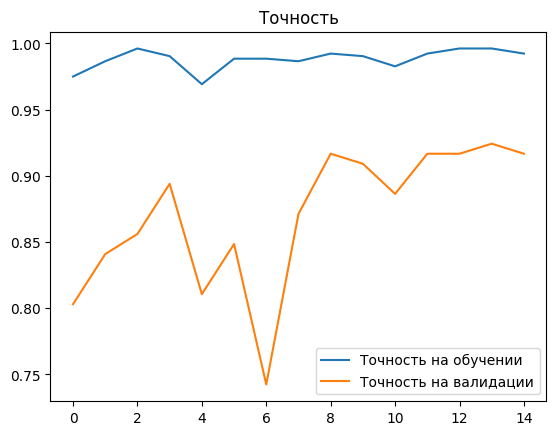

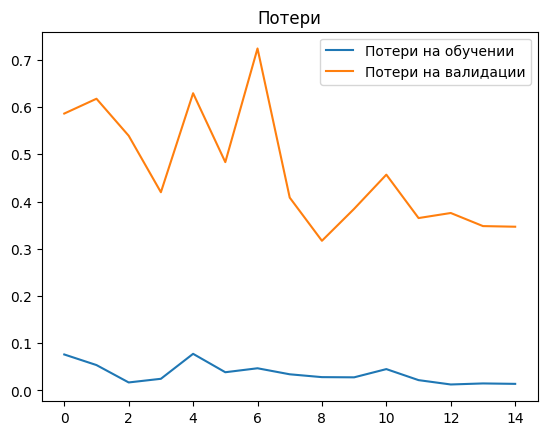

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure()
    plt.plot(epochs, acc, label='Точность на обучении')
    plt.plot(epochs, val_acc, label='Точность на валидации')
    plt.title('Точность')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, label='Потери на обучении')
    plt.plot(epochs, val_loss, label='Потери на валидации')
    plt.title('Потери')
    plt.legend()

    plt.show()

# Вызов после обучения
plot_training_history(history)


In [ ]:
from PIL import Image
import numpy as np

def predict_chess_piece(image_path):
    # Открываем изображение и подготавливаем его
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))  # Размер должен совпадать с обучением
    img_array = np.array(img, dtype="float32") / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Делаем предсказание
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Индекс класса
    confidence = predictions[0][predicted_class]  # Уверенность модели

    return predicted_class, confidence


In [ ]:
# Сохранение модели
model.save("chess_classification_model.keras")
print("Модель успешно сохранена!")

# Загрузка модели
from tensorflow.keras.models import load_model
model = load_model("chess_classification_model.keras")


Модель успешно сохранена!


In [ ]:
# НЕВЕРНОЕ ПРЕДСКАЗаНИЕ!!!!!!!!!!!!!
import os
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

# Загрузка обученной модели
model_path = "/content/chess_classification_model.keras"
model = load_model(model_path)

# Словарь классов шахматных фигур
class_labels = {
    0: "Пешка",
    1: "Конь",
    2: "Слон",
    3: "Ладья",
    4: "Ферзь"
}

# Функция для предсказания класса шахматной фигуры
def predict_chess_piece(image_path):
    try:
        # Открываем изображение и преобразуем его в RGB
        img = Image.open(image_path).convert("RGB")
        # Изменяем размер изображения на 224x224 (размер, используемый в обучении)
        img = img.resize((224, 224))
        # Преобразуем изображение в массив NumPy и нормализуем (значения от 0 до 1)
        img_array = np.array(img, dtype="float32") / 255.0
        # Добавляем размерность для батча
        img_array = np.expand_dims(img_array, axis=0)

        # Делаем предсказание
        predictions = model.predict(img_array)
        # Находим индекс класса с максимальной вероятностью
        predicted_class = np.argmax(predictions)
        confidence = predictions[0][predicted_class]

        # Возвращаем индекс и вероятность
        return predicted_class, confidence
    except Exception as e:
        print(f"Ошибка при обработке изображения {image_path}: {e}")
        return None, None

# Тестирование на одном изображении
def test_single_image(image_path):
    print(f"Тестируем изображение: {image_path}")
    predicted_class, confidence = predict_chess_piece(image_path)
    if predicted_class is not None:
        print(f"Предсказанный класс: {class_labels[predicted_class]}")
        print(f"Уверенность: {confidence:.2f}")
    else:
        print("Не удалось сделать предсказание.")

# Автоматическое тестирование на всех изображениях в директории
def test_multiple_images(test_dir):
    print(f"Тестируем изображения из директории: {test_dir}")
    for class_name in os.listdir(test_dir):
        class_path = os.path.join(test_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                predicted_class, confidence = predict_chess_piece(img_path)
                if predicted_class is not None:
                    print(f"Изображение: {img_name}")
                    print(f"Ожидаемый класс: {class_name}, Предсказанный класс: {class_labels[predicted_class]}")
                    print(f"Уверенность: {confidence:.2f}\n")

# Пример тестирования на одном изображении
single_image_path = "/content/chess_figures/validation/Pawn/00000010_resized.jpg"  # Укажите реальный путь к изображению
test_single_image(single_image_path)

# Пример тестирования на всех изображениях
test_directory = "/content/chess_figures/validation"  # Укажите реальный путь к директории
test_multiple_images(test_directory)


Тестируем изображение: /content/chess_figures/validation/Pawn/00000010_resized.jpg
Ошибка при обработке изображения /content/chess_figures/validation/Pawn/00000010_resized.jpg: [Errno 2] No such file or directory: '/content/chess_figures/validation/Pawn/00000010_resized.jpg'
Не удалось сделать предсказание.
Тестируем изображения из директории: /content/chess_figures/validation
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Изображение: 00000045_resized.jpg
Ожидаемый класс: Rook, Предсказанный класс: Конь
Уверенность: 1.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Изображение: 00000036_resized.jpg
Ожидаемый класс: Rook, Предсказанный класс: Пешка
Уверенность: 0.92

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Изображение: 00000059_resized.jpg
Ожидаемый класс: Rook, Предсказанный класс: Конь
Уверенность: 0.96

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Изображение: 00000075_resized.jpg
Ожидаемый класс: Rook, Предсказанный класс: Конь
Уверенность: 1.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Изображение: 00000067_r

Found 519 images belonging to 5 classes.
Found 132 images belonging to 5 classes.
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 256s 12s/step - accuracy: 0.1810 - loss: 2.8512 - val_accuracy: 0.1742 - val_loss: 1.7560 - learning_rate: 1.0000e-04
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 255s 11s/step - accuracy: 0.2941 - loss: 2.1425 - val_accuracy: 0.1742 - val_loss: 1.7382 - learning_rate: 1.0000e-04
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 199s 12s/step - accuracy: 0.3429 - loss: 1.9686 - val_accuracy: 0.1742 - val_loss: 1.8570 - learning_rate: 1.0000e-04
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 206s 12s/step - accuracy: 0.3743 - loss: 2.1419 - val_accuracy: 0.1742 - val_loss: 2.0409 - learning_rate: 1.0000e-04
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 256s 12s/step - accuracy: 0.4425 - loss: 1.7462 - val_accuracy: 0.2197 - val_loss: 1.9961 - learning_rate: 1.0000e-04
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 197s 11s/step - accuracy: 0.5397 - loss: 1.4483 - val_accuracy: 0.2424 - val_loss: 2.0245 - learning

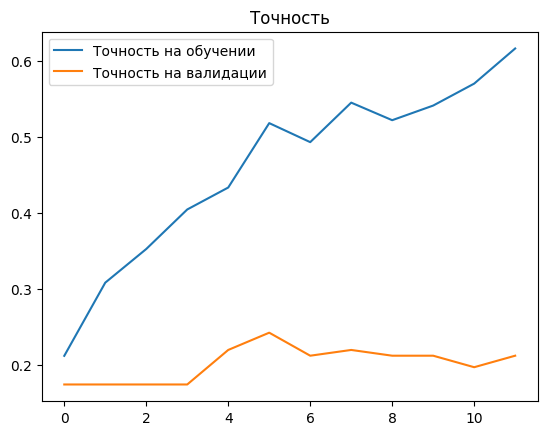

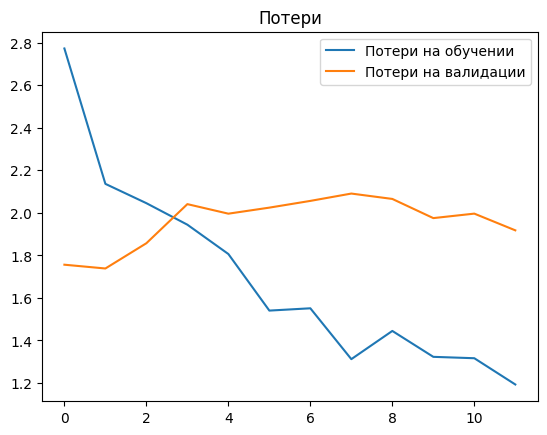

In [ ]:
# КРАЙНЯЯ САМАЯ ОБУЧЕНННАЯ
import os
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Пути к данным
train_dir = '/content/chess_figures/train'
val_dir = '/content/chess_figures/validation'

# Классы шахматных фигур
class_labels = {
    0: "Пешка",
    1: "Конь",
    2: "Слон",
    3: "Ладья",
    4: "Ферзь"
}

# Аугментация данных
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Нормализация
    rotation_range=40,  # Повороты
    width_shift_range=0.3,  # Горизонтальные сдвиги
    height_shift_range=0.3,  # Вертикальные сдвиги
    shear_range=0.3,  # Сдвиги
    zoom_range=0.3,  # Масштабирование
    horizontal_flip=True,  # Зеркальное отражение
    fill_mode='nearest'  # Заполнение пустых областей
)

# Генераторы данных
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Создание модели на основе EfficientNetB0
input_layer = Input(shape=(224, 224, 3))
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_tensor=input_layer)

# Разморозим последние 50 слоёв для тонкой настройки
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Добавляем классификационные слои
x = Flatten()(base_model.output)
x = BatchNormalization()(x)  # Batch Normalization
x = Dropout(0.5)(x)  # Dropout для регуляризации
output_layer = Dense(len(class_labels), activation="softmax")(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Компиляция модели
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Низкий learning rate для тонкой настройки
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# EarlyStopping и ReduceLROnPlateau для лучшей оптимизации
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Останавливаем обучение, если валидационная ошибка не уменьшается 10 эпох подряд
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Уменьшаем learning rate в 2 раза
    patience=5,  # Если валидационная ошибка не уменьшается 5 эпох
    min_lr=1e-6  # Минимальный learning rate
)

# Обучение модели
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # Максимальное количество эпох
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Сохранение улучшенной модели
model.save("enhanced_chess_classification_model.keras")
print("Улучшенная модель успешно сохранена!")

# Построение графиков обучения
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    # График точности
    plt.figure()
    plt.plot(epochs, acc, label='Точность на обучении')
    plt.plot(epochs, val_acc, label='Точность на валидации')
    plt.title('Точность')
    plt.legend()

    # График потерь
    plt.figure()
    plt.plot(epochs, loss, label='Потери на обучении')
    plt.plot(epochs, val_loss, label='Потери на валидации')
    plt.title('Потери')
    plt.legend()

    plt.show()

# Вызов функции
plot_training_history(history)


Found 519 images belonging to 5 classes.
Found 132 images belonging to 5 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 246s 11s/step - accuracy: 0.2148 - loss: 2.6498 - val_accuracy: 0.2121 - val_loss: 1.6449 - learning_rate: 1.0000e-04
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 186s 11s/step - accuracy: 0.2887 - loss: 2.3203 - val_accuracy: 0.2121 - val_loss: 1.6171 - learning_rate: 1.0000e-04
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 212s 11s/step - accuracy: 0.3015 - loss: 2.1281 - val_accuracy: 0.2652 - val_loss: 1.5946 - learning_rate: 1.0000e-04
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 215s 12s/step - accuracy: 0.4198 - loss: 1.7293 - val_accuracy: 0.2652 - val_loss: 1.5891 - learning_rate: 1.0000e-04
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 200s 11s/step - accuracy: 0.4616 - loss: 1.6044 - val_accuracy: 0.2273 - val_loss: 1.5971 - learning_rate: 1.0000e-04
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 195s 11s/step - accuracy: 0.4361 - loss: 1.6767 - val_accuracy: 0.2121 - val_loss: 1.6080 - learning_rate: 1.0000e-04
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 192s 11s/step - accuracy: 0.5357 - lo

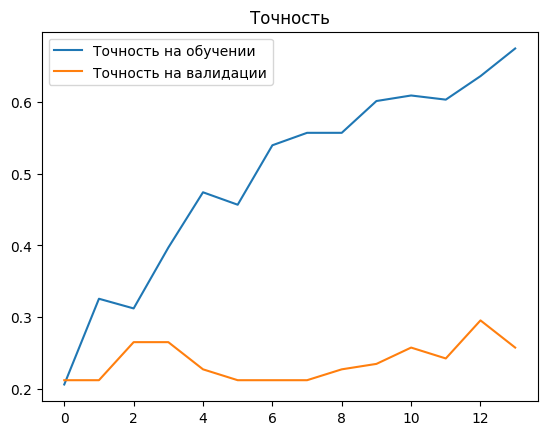

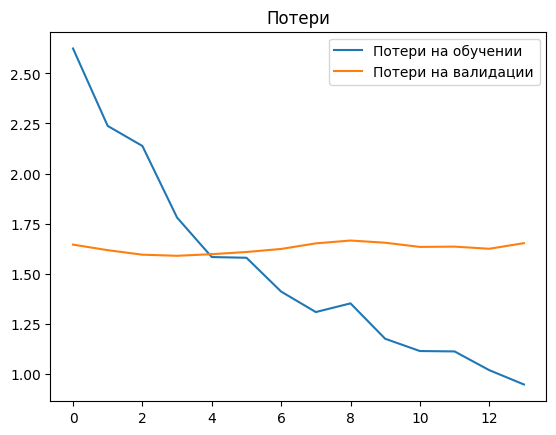

5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step
              precision    recall  f1-score   support

       Пешка       0.00      0.00      0.00        23
        Конь       0.00      0.00      0.00        28
        Слон       0.00      0.00      0.00        29
       Ладья       0.27      1.00      0.42        35
       Ферзь       0.00      0.00      0.00        17

    accuracy                           0.27       132
   macro avg       0.05      0.20      0.08       132
weighted avg       0.07      0.27      0.11       132



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


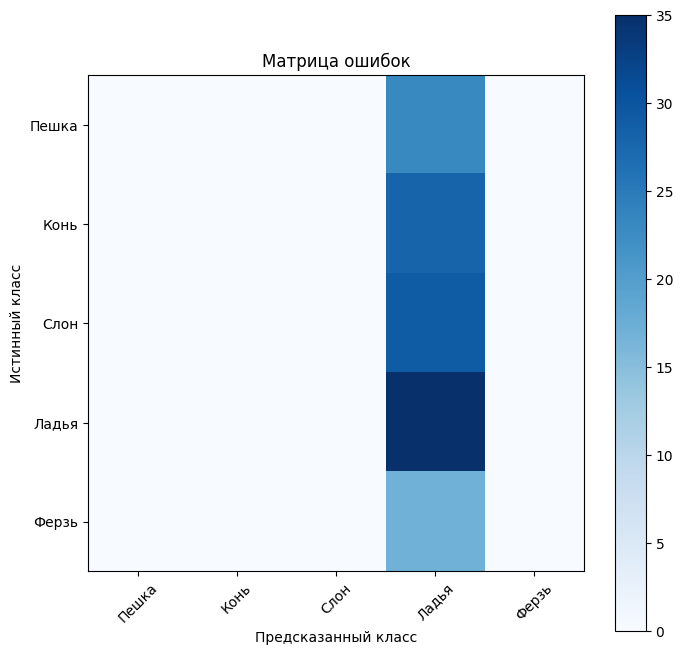

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Input, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from flask import Flask, request, jsonify
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

# Пути к данным
train_dir = '/content/chess_figures/train'
val_dir = '/content/chess_figures/validation'

# Классы шахматных фигур
class_labels = {
    0: "Пешка",
    1: "Конь",
    2: "Слон",
    3: "Ладья",
    4: "Ферзь"
}

# Аугментация данных
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Нормализация
    rotation_range=40,  # Повороты
    width_shift_range=0.3,  # Горизонтальные сдвиги
    height_shift_range=0.3,  # Вертикальные сдвиги
    shear_range=0.3,  # Сдвиги
    zoom_range=0.3,  # Масштабирование
    horizontal_flip=True,  # Зеркальное отражение
    vertical_flip=True,  # Вертикальное отражение
    fill_mode='nearest',  # Заполнение пустых областей
    brightness_range=[0.5, 1.5],  # Регулировка яркости
    channel_shift_range=30.0  # Изменение цветовых каналов
)

# Генераторы данных
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Создание модели на основе EfficientNetB0
input_layer = Input(shape=(224, 224, 3))
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_tensor=input_layer)

# Разморозим последние 50 слоёв для тонкой настройки
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Добавляем классификационные слои
x = GlobalAveragePooling2D()(base_model.output)  # Используем GlobalAveragePooling2D для улучшения производительности
x = BatchNormalization()(x)  # Нормализация
x = Dropout(0.5)(x)  # Dropout для регуляризации
output_layer = Dense(len(class_labels), activation="softmax")(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Компиляция модели
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Низкий learning rate для тонкой настройки
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# EarlyStopping и ReduceLROnPlateau для лучшей оптимизации
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Останавливаем обучение, если валидационная ошибка не уменьшается 10 эпох подряд
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Уменьшаем learning rate в 2 раза
    patience=5,  # Если валидационная ошибка не уменьшается 5 эпох
    min_lr=1e-6  # Минимальный learning rate
)

# Обучение модели
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # Максимальное количество эпох
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Сохранение улучшенной модели
model.save("enhanced_chess_classification_model.keras")
print("Улучшенная модель успешно сохранена!")

# Оценка модели: Матрица ошибок и отчет
def evaluate_model(model, val_generator):
    predictions = model.predict(val_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = val_generator.classes

    # Вывод отчета
    print(classification_report(true_classes, predicted_classes, target_names=list(class_labels.values())))

    # Построение матрицы ошибок
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Матрица ошибок')
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, list(class_labels.values()), rotation=45)
    plt.yticks(tick_marks, list(class_labels.values()))
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Истинный класс')
    plt.show()

# Визуализация истории обучения
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    # График точности
    plt.figure()
    plt.plot(epochs, acc, label='Точность на обучении')
    plt.plot(epochs, val_acc, label='Точность на валидации')
    plt.title('Точность')
    plt.legend()

    # График потерь
    plt.figure()
    plt.plot(epochs, loss, label='Потери на обучении')
    plt.plot(epochs, val_loss, label='Потери на валидации')
    plt.title('Потери')
    plt.legend()

    plt.show()

# Вызов функции
plot_training_history(history)
evaluate_model(model, val_generator)

# Интеграция с Flask API для предсказаний
app = Flask(__name__)

# Загрузка модели
model = tf.keras.models.load_model('enhanced_chess_classification_model.keras')

# Функция предсказания
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Добавляем batch dimension
    img_array /= 255.0  # Нормализуем изображение
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    return class_labels[predicted_class]

@app.route('/predict', methods=['POST'])
def predict():
    file = request.files['image']
    file_path = '/tmp/' + file.filename
    file.save(file_path)
    predicted_class = predict_image(file_path)
    return jsonify({'predicted_class': predicted_class})

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
from tensorflow.keras.models import load_model

# Загрузка сохраненной модели
model = load_model("enhanced_chess_classification_model.keras")

# Пример предсказания
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = '/content/chess_figures/train/Rook/00000002_resized.jpg'  # Замените на путь к тестовому изображению
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print(f"Предсказанный класс: {class_labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Предсказанный класс: Ладья


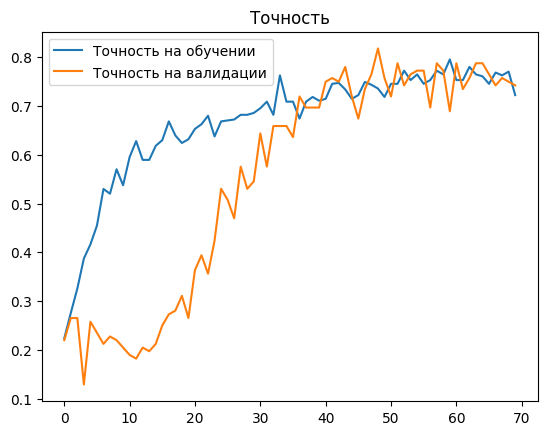

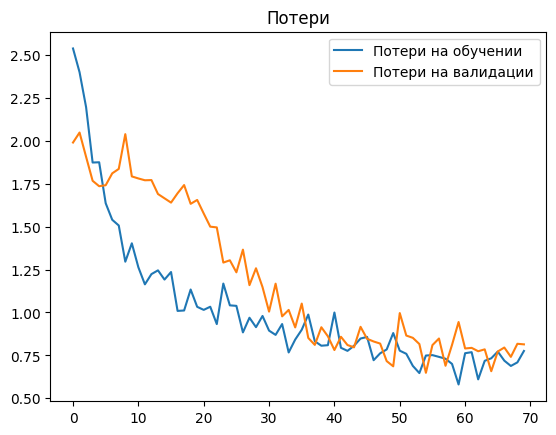

In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    # График точности
    plt.figure()
    plt.plot(epochs, acc, label='Точность на обучении')
    plt.plot(epochs, val_acc, label='Точность на валидации')
    plt.title('Точность')
    plt.legend()
    plt.show()

    # График потерь
    plt.figure()
    plt.plot(epochs, loss, label='Потери на обучении')
    plt.plot(epochs, val_loss, label='Потери на валидации')
    plt.title('Потери')
    plt.legend()
    plt.show()

plot_training_history(history)


In [ ]:
#Итоговый код на модель
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight

# Пути к данным
train_dir = '/content/chess_figures/train'
val_dir = '/content/chess_figures/validation'

# Классы шахматных фигур
class_labels = {
    0: "Пешка",
    1: "Конь",
    2: "Слон",
    3: "Ладья",
    4: "Ферзь"
}

# Аугментация данных
# Добавляем разнообразие изображений
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Генераторы данных
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Вычисляем веса классов
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))

# Создание модели
input_layer = Input(shape=(224, 224, 3))
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_tensor=input_layer)

# Разморозим последние 50 слоев для тонкой настройки
for layer in base_model.layers[-50:]:
    layer.trainable = True

x = Flatten()(base_model.output)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(class_labels), activation="softmax")(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Компиляция модели
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks для улучшения обучения
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=5,
    min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    "best_chess_model.keras",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# Обучение модели
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    class_weight=class_weight_dict,
    verbose=1
)

# Сохранение модели после обучения
model.save("enhanced_chess_classification_model.keras")
print("Модель успешно сохранена!")

# Построение графиков обучения
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    # График точности
    plt.figure()
    plt.plot(epochs, acc, label='Точность на обучении')
    plt.plot(epochs, val_acc, label='Точность на валидации')
    plt.title('Точность')
    plt.legend()
    plt.show()

    # График потерь
    plt.figure()
    plt.plot(epochs, loss, label='Потери на обучении')
    plt.plot(epochs, val_loss, label='Потери на валидации')
    plt.title('Потери')
    plt.legend()
    plt.show()

plot_training_history(history)

# Тестирование сохраненной модели
def test_model(model_path, img_path):
    model = load_model(model_path)

    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    print(f"Предсказанный класс: {class_labels[predicted_class]}")

# Пример тестирования
# test_model("enhanced_chess_classification_model.keras", "/path/to/test/image.jpg")


In [ ]:
!pip install pyngrok
!pip install --upgrade tensorflow keras jax jaxlib




In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight

# Указываем корректные пути
train_dir = '/content/chess_figures/train_new'
val_dir = '/content/chess_figures/validation'

# Проверка наличия директорий
if not os.path.exists(train_dir) or not os.path.exists(val_dir):
    raise FileNotFoundError(f"Убедитесь, что директории {train_dir} и {val_dir} существуют и содержат данные.")

# Генераторы данных
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Создание генераторов
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

# Вычисление весов классов
train_classes = np.concatenate([train_generator[i][1] for i in range(len(train_generator))])
train_classes = np.argmax(train_classes, axis=1)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_classes),
    y=train_classes
)
class_weight_dict = dict(enumerate(class_weights))

# Создание модели
def create_model(input_shape=(224, 224, 3), num_classes=len(train_generator.class_indices)):
    input_layer = Input(shape=input_shape)
    base_model = EfficientNetB0(weights="imagenet", include_top=False, input_tensor=input_layer)

    # Размораживаем последние 50 слоев для обучения
    for layer in base_model.layers[-50:]:
        layer.trainable = True

    x = Flatten()(base_model.output)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Инициализация модели
model = create_model()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-6)
checkpoint = ModelCheckpoint("best_model.keras", monitor="val_loss", save_best_only=True, verbose=1)

# Обучение модели
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Сохранение модели
model.save("chess_model_final.keras")

print("Модель успешно обучена и сохранена.")


Found 519 images belonging to 5 classes.
Found 132 images belonging to 5 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1888 - loss: 2.8826
Epoch 1: val_loss improved from inf to 1.94786, saving model to best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 113s 6s/step - accuracy: 0.1888 - loss: 2.8821 - val_accuracy: 0.1288 - val_loss: 1.9479 - learning_rate: 1.0000e-04
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.2947 - loss: 2.3067
Epoch 2: val_loss did not improve from 1.94786
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 327ms/step - accuracy: 0.2947 - loss: 2.3038 - val_accuracy: 0.1288 - val_loss: 2.3275 - learning_rate: 1.0000e-04
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.4051 - loss: 1.9218
Epoch 3: val_loss did not improve from 1.94786
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 253ms/step - accuracy: 0.4035 - loss: 1.9209 - val_accuracy: 0.1288 - val_loss: 2.3715 - learning_rate: 1.0000e-04
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.3828 - loss: 1.9738
Epoch 4: val_loss did not improve from 1.94786
9/9 ━━━━━━━━━━━━━━━━━━━━ 8

In [ ]:
import os

base_dir = "/content/chess_figures"
folders = ["train_new", "validation", "test"]

for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    if os.path.exists(folder_path):
        print(f"Содержимое папки {folder_path}:")
        for class_folder in os.listdir(folder_path):
            class_path = os.path.join(folder_path, class_folder)
            if os.path.isdir(class_path):
                print(f"  Класс: {class_folder}")
                print(f"    Количество изображений: {len(os.listdir(class_path))}")
            else:
                print(f"  Файл {class_folder} не является папкой.")
    else:
        print(f"Папка {folder_path} не существует.")


Содержимое папки /content/chess_figures/train_new:
  Класс: Queen-Resized
    Количество изображений: 92
  Класс: knight-resize
    Количество изображений: 139
  Класс: bishop_resized
    Количество изображений: 112
  Класс: pawn_resized
    Количество изображений: 65
  Класс: Rook-resize
    Количество изображений: 111
Содержимое папки /content/chess_figures/validation:
  Класс: Queen-Resized
    Количество изображений: 23
  Класс: knight-resize
    Количество изображений: 35
  Класс: bishop_resized
    Количество изображений: 29
  Класс: pawn_resized
    Количество изображений: 17
  Класс: Rook-resize
    Количество изображений: 28
Содержимое папки /content/chess_figures/test:


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Пути к папкам
train_dir = "/content/chess_figures/train_new"
test_dir = "/content/chess_figures/test"

# Функция для проверки и создания папок
def ensure_dir_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Создание папок для тестовых данных, если они не существуют
def prepare_test_folders(source_dir, dest_dir):
    for class_name in os.listdir(source_dir):
        class_dest_path = os.path.join(dest_dir, class_name)
        ensure_dir_exists(class_dest_path)
        print(f"Убедились, что папка существует: {class_dest_path}")

# Распределение изображений в тестовые папки
def distribute_test_data(source_dir, dest_dir, test_size=0.2):
    prepare_test_folders(source_dir, dest_dir)  # Убедиться, что все папки созданы
    for class_name in os.listdir(source_dir):
        class_source_path = os.path.join(source_dir, class_name)
        class_dest_path = os.path.join(dest_dir, class_name)

        # Список всех изображений класса
        images = os.listdir(class_source_path)

        # Разделение на тренировочные и тестовые данные
        _, test_images = train_test_split(images, test_size=test_size, random_state=42)

        # Перемещение тестовых данных
        for img in test_images:
            source_img_path = os.path.join(class_source_path, img)
            dest_img_path = os.path.join(class_dest_path, img)

            # Проверка наличия папки и копирование
            ensure_dir_exists(class_dest_path)
            shutil.copy(source_img_path, dest_img_path)

        print(f"Класс {class_name}: перемещено {len(test_images)} тестовых изображений.")

# Вызов функции для распределения данных
distribute_test_data(train_dir, test_dir, test_size=0.2)

print("Данные успешно распределены!")


Убедились, что папка существует: /content/chess_figures/test/Queen-Resized
Убедились, что папка существует: /content/chess_figures/test/knight-resize
Убедились, что папка существует: /content/chess_figures/test/bishop_resized
Убедились, что папка существует: /content/chess_figures/test/pawn_resized
Убедились, что папка существует: /content/chess_figures/test/Rook-resize
Класс Queen-Resized: перемещено 19 тестовых изображений.
Класс knight-resize: перемещено 28 тестовых изображений.
Класс bishop_resized: перемещено 23 тестовых изображений.
Класс pawn_resized: перемещено 13 тестовых изображений.
Класс Rook-resize: перемещено 23 тестовых изображений.
Данные успешно распределены!


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf

# Пути к данным
base_dir = "/content/chess_figures"
train_dir = os.path.join(base_dir, "train_new")
val_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

# Проверка существования папок
for folder in [train_dir, val_dir, test_dir]:
    if not os.path.exists(folder):
        os.makedirs(folder)
        print(f"Папка {folder} создана. Добавьте изображения в соответствующие классы.")

# Генераторы данных с расширенной аугментацией
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    brightness_range=[0.8, 1.2]
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Проверка данных
print(f"Train samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")
print(f"Test samples: {test_generator.samples}")

# Расчет весов классов
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))
print(f"Class weights: {class_weight_dict}")

# Создание модели с MobileNetV2
def create_model(input_shape=(224, 224, 3), num_classes=len(train_generator.class_indices)):
    input_layer = Input(shape=input_shape)
    base_model = MobileNetV2(weights="imagenet", include_top=False, input_tensor=input_layer)

    # Заморозить большинство слоев
    for layer in base_model.layers[:-30]:
        layer.trainable = False
    for layer in base_model.layers[-30:]:
        layer.trainable = True

    x = Flatten()(base_model.output)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(
        optimizer=Adam(learning_rate=1e-5),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Обучение модели
model = create_model()

callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6, verbose=1),
    ModelCheckpoint("best_model.keras", monitor="val_loss", save_best_only=True, verbose=1)
]

# Этап 1: Предобучение с замороженными слоями
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    class_weight=class_weight_dict,
    callbacks=callbacks
)

# Этап 2: Разморозить все слои и дообучить
for layer in model.layers:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-6),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_fine = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    class_weight=class_weight_dict,
    callbacks=callbacks
)

# Сохранение модели
model.save("chess_model_updated_v3.keras")
print("Модель успешно обучена и сохранена.")

# Тестирование модели
def test_model():
    model = load_model("chess_model_updated_v3.keras")
    print("Модель успешно загружена!")

    if test_generator.samples == 0:
        print("Тестовая папка пуста. Добавьте тестовые изображения и повторите.")
        return

    results = model.evaluate(test_generator, verbose=1)
    print(f"Точность на тестовых данных: {results[1] * 100:.2f}%")

    # Предсказания на тестовых данных
    predictions = model.predict(test_generator, verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)

    print("Предсказания завершены.")

test_model()


Found 519 images belonging to 5 classes.
Found 132 images belonging to 5 classes.
Found 106 images belonging to 5 classes.
Train samples: 519
Validation samples: 132
Test samples: 106
Class weights: {0: 1.1282608695652174, 1: 0.9351351351351351, 2: 0.9267857142857143, 3: 0.7467625899280576, 4: 1.596923076923077}


<ipython-input-7-9191c053c32d>:79: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_tensor=input_layer)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2138 - loss: 2.7590
Epoch 1: val_loss improved from inf to 2.39623, saving model to best_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.2142 - loss: 2.7544 - val_accuracy: 0.2273 - val_loss: 2.3962 - learning_rate: 1.0000e-05
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2503 - loss: 2.4099
Epoch 2: val_loss improved from 2.39623 to 2.13452, saving model to best_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.2502 - loss: 2.4123 - val_accuracy: 0.2348 - val_loss: 2.1345 - learning_rate: 1.0000e-05
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2592 - loss: 2.1309
Epoch 3: val_loss improved from 2.13452 to 1.98270, saving model to best_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.2583 - loss: 2.1403 - val_accuracy: 0.2500 - val_loss: 1.9827 - learning_rate: 1.0000e-05
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2707 - loss: 2.3823

In [ ]:
from tensorflow.keras.models import load_model

# Укажите имя файла модели
model_path = "best_model.keras"

# Загрузка модели
try:
    model = load_model(model_path)
    print("Модель успешно загружена!")
except ValueError as e:
    print(f"Ошибка загрузки модели: {e}")


Модель успешно загружена!


In [ ]:
import numpy as np

# Получение предсказаний на тестовых данных
predictions = model.predict(test_generator, verbose=1)

# Преобразование вероятностей в предсказанные классы
predicted_classes = np.argmax(predictions, axis=1)

# Сопоставление индексов классов с их именами
class_indices = test_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Переворот словаря

# Отображение результатов
for i in range(len(test_generator.filenames)):
    file_name = test_generator.filenames[i]
    predicted_class = class_labels[predicted_classes[i]]
    confidence = np.max(predictions[i])  # Максимальная вероятность
    print(f"Файл: {file_name} | Предсказанный класс: {predicted_class} | Уверенность: {confidence:.2f}")


3/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step
Файл: Queen-Resized/00000004_resized.jpg | Предсказанный класс: Queen-Resized | Уверенность: 0.43
Файл: Queen-Resized/00000013_resized.jpg | Предсказанный класс: Queen-Resized | Уверенность: 0.39
Файл: Queen-Resized/00000022_resized.jpg | Предсказанный класс: Queen-Resized | Уверенность: 0.95
Файл: Queen-Resized/00000030_resized.jpg | Предсказанный класс: Queen-Resized | Уверенность: 0.37
Файл: Queen-Resized/00000048_resized.jpg | Предсказанный класс: Queen-Resized | Уверенность: 0.70
Файл: Queen-Resized/00000057_resized.jpg | Предсказанный класс: Queen-Resized | Уверенность: 0.73
Файл: Queen-Resized/00000060_resized.jpg | Предсказанный класс: Queen-Resized | Уверенность: 0.97
Файл: Queen-Resized/00000063_resized.jpg | Предсказанный класс: Queen-Resized | Уверенность: 0.83
Файл: Queen-Resized/00000076_resized.jpg | Предсказанный класс: bishop_resized | Уверенность: 0.65
Файл: Queen-Resized/00000095_resized.jpg | Предсказанный класс: pawn_resized | Ув

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


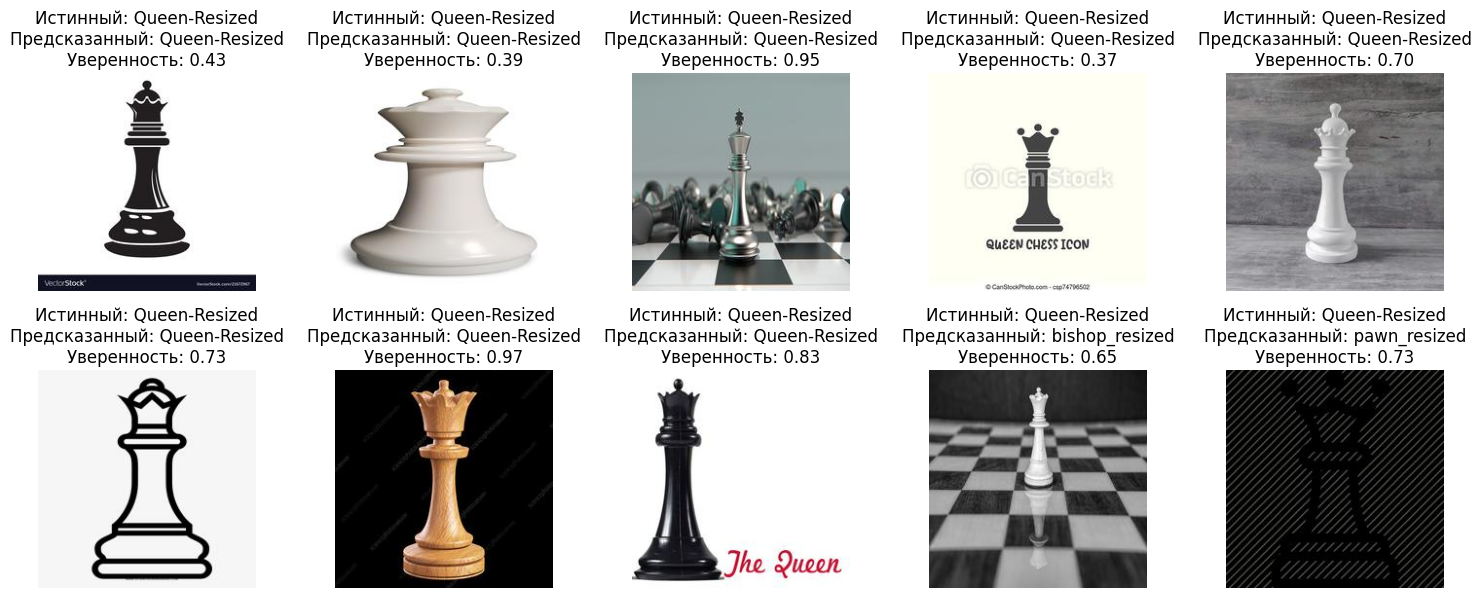

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Получение предсказаний на тестовых данных
predictions = model.predict(test_generator, verbose=1)

# Преобразование вероятностей в предсказанные классы
predicted_classes = np.argmax(predictions, axis=1)

# Сопоставление индексов классов с их именами
class_indices = test_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Переворот словаря

# Отображение нескольких изображений с предсказаниями
def display_predictions(generator, predictions, predicted_classes, class_labels, num_images=10):
    files = generator.filenames
    true_classes = generator.classes  # Истинные классы изображений
    images = generator.filepaths  # Полные пути к файлам

    plt.figure(figsize=(15, 15))

    for i in range(num_images):
        # Загрузка изображения
        img = plt.imread(images[i])

        # Настройка подписи для отображения
        true_class = class_labels[true_classes[i]]
        predicted_class = class_labels[predicted_classes[i]]
        confidence = np.max(predictions[i])  # Максимальная вероятность

        plt.subplot(5, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Истинный: {true_class}\nПредсказанный: {predicted_class}\nУверенность: {confidence:.2f}")

    plt.tight_layout()
    plt.show()

# Вызов функции для отображения предсказаний
display_predictions(test_generator, predictions, predicted_classes, class_labels, num_images=10)
